<a href="https://colab.research.google.com/github/ayanokoji024/friendly-potato/blob/main/Iris_Dataset_ML_Lab_Assignment_1_020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [2]:
# Imports
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Loading Iris dataset and storing it in a panda dataframe

In [3]:
iris = load_iris()
# print(iris)

df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
# 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

print(df)
print(iris.feature_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### Splitting the dataset into training and testing datasets

In [7]:
features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features]
y = df['target']

# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability

def decision_tree_model_iris(test_ratio, X, y, criterion_string="entropy"):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  decision_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 4, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print("Confusion Matrix: ")
  print(cm)
  # ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_).plot()
  tree.plot_tree(decision_tree_model)

For test-train ratio of 0.2 to 0.8
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89         4
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.93      0.97      0.95        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix: 
[[13  0  0]
 [ 0  4  0]
 [ 0  1 12]]


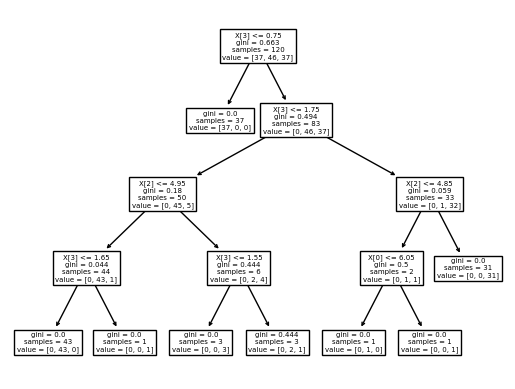

In [8]:
print("For test-train ratio of 0.2 to 0.8")
decision_tree_model_iris(0.2,X,y,"gini")



For test-train ratio of 0.3 to 0.7
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix: 
[[21  0  0]
 [ 0 11  1]
 [ 0  0 12]]


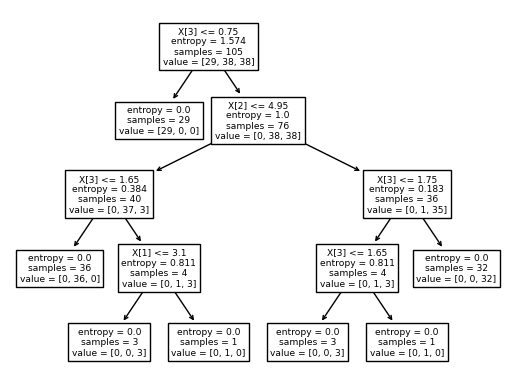

In [9]:
print("\nFor test-train ratio of 0.3 to 0.7")
decision_tree_model_iris(0.3,X,y)



For test-train ratio of 0.4 to 0.6
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.76      0.86        21
           2       0.81      1.00      0.89        21

    accuracy                           0.92        60
   macro avg       0.94      0.92      0.92        60
weighted avg       0.93      0.92      0.92        60

Confusion Matrix: 
[[18  0  0]
 [ 0 16  5]
 [ 0  0 21]]


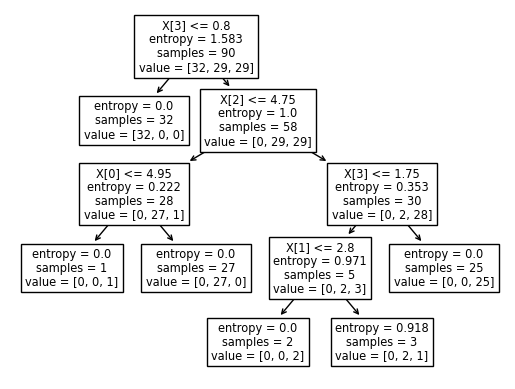

In [10]:
print("\nFor test-train ratio of 0.4 to 0.6")
decision_tree_model_iris(0.4,X,y)